In [1]:
# install library for japanese
# !pip install japanize-matplotlib | tail -n 1

In [2]:
# Data Wrangling

# disable warnings
import warnings
warnings.filterwarnings('ignore')

# library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# matplotlib jpn support
import japanize_matplotlib

# dataframe display function
from IPython.display import display

# diaply adjustment
# numpy float display adjustment
np.set_printoptions(suppress = True, precision = 4)

# pandas float display adjustment
pd.options.display.float_format = '{:.4f}'.format

# show all columns of dataframe
pd.set_option('display.max_columns', None)

# default font
plt.rcParams['font.size'] = 14

# set random number
random_seed = 123

# Quantitative and statistical analysis

### タイタニック・データセットの各項目

**生存**(survival) : (0=死亡、1=生存)     
**等室** (pclass) : (1=1等船室 2=2等船室 3=3等船室)  
**性別** (sex) :  (male=男性、female=女性)  
**年齢** (age)  
**兄弟配偶者数** (sibsp) : 同乗している兄弟と配偶者の数   
**両親子供数** (parch) : 同乗している両親と子供の数  
**料金** (fare)  
**乗船港コード**(embarked) :    
(C=Cherbourg、Q=Queenstown、S=Southampton)   
**等室名** (class) : (First=一等船室 Second=二等船室 Third=三等船室)  
**男女子供** (who) : (man=男　women=女　child=子供)  
**成人男子** (adult_male):  True / False  
**デッキ** (deck):  船室番号の頭文字 (A - G)  
**乗船港** (embark_town) : Southampton/Cherbourg/Queenstown  
**生存可否** (alive): yes / no   
**独身** (alone): True / False  



In [3]:
# library
import seaborn as sns

# load the data
df_titanic = sns.load_dataset('titanic')

# translate columns names in Japanese
columns_t = ['生存', '等室', '性別', '年齢', '兄弟配偶者数', 
             '両親子供数', '料金', '乗船港コード', '等室名', 
             '男女子供', '成人男子', 'デッキ', '乗船港', '生存可否', '独身']

df_titanic.columns = columns_t

# display dataset
display(df_titanic.head())

,生存,等室,性別,年齢,兄弟配偶者数,両親子供数,料金,乗船港コード,等室名,男女子供,成人男子,デッキ,乗船港,生存可否,独身
0,0,3,male,22.0000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### check null data

In [4]:
print(df_titanic.isnull().sum())

生存          0
等室          0
性別          0
年齢        177
兄弟配偶者数      0
両親子供数       0
料金          0
乗船港コード      2
等室名         0
男女子供        0
成人男子        0
デッキ       688
乗船港         2
生存可否        0
独身          0
dtype: int64


### check the number of specific columns

In [5]:
# display the number of each segments in columns `乗船港`
print(df_titanic['乗船港'].value_counts())
print()

# display the number of each segments in columns `生存可否`
print(df_titanic['生存可否'].value_counts())

Southampton    644
Cherbourg      168
Queenstown      77
Name: 乗船港, dtype: int64

no     549
yes    342
Name: 生存可否, dtype: int64


###  summary statistics

In [6]:
# display the summary statitics
display(df_titanic.describe())

,生存,等室,年齢,兄弟配偶者数,両親子供数,料金
count,891.0000,891.0000,714.0000,891.0000,891.0000,891.0000
mean,0.3838,2.3086,29.6991,0.5230,0.3816,32.2042
std,0.4866,0.8361,14.5265,1.1027,0.8061,49.6934
min,0.0000,1.0000,0.4200,0.0000,0.0000,0.0000
25%,0.0000,2.0000,20.1250,0.0000,0.0000,7.9104
50%,0.0000,3.0000,28.0000,0.0000,0.0000,14.4542
75%,1.0000,3.0000,38.0000,1.0000,0.0000,31.0000
max,1.0000,3.0000,80.0000,8.0000,6.0000,512.3292


### display the data grouped by `性別`

In [7]:
display(df_titanic.groupby('性別').mean())

,生存,等室,年齢,兄弟配偶者数,両親子供数,料金,成人男子,独身
性別,,,,,,,,
female,0.7420,2.1592,27.9157,0.6943,0.6497,44.4798,0.0000,0.4013
male,0.1889,2.3899,30.7266,0.4298,0.2357,25.5239,0.9307,0.7123


### show graphs(numeric data)

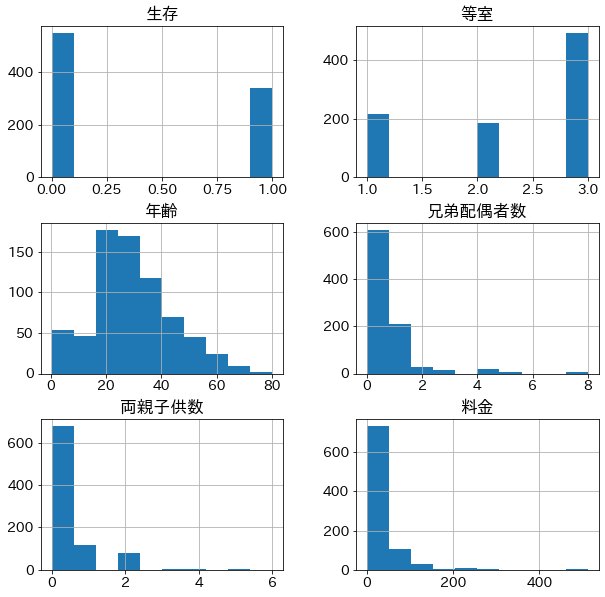

In [8]:
# define the columns
columns_n = ['生存', '等室', '年齢', '兄弟配偶者数', '両親子供数', '料金']

# adjust the graph
plt.rcParams['figure.figsize'] = (10, 10)

# show histograms
df_titanic[columns_n].hist()
plt.show()

### show graphs(non-numeric data)

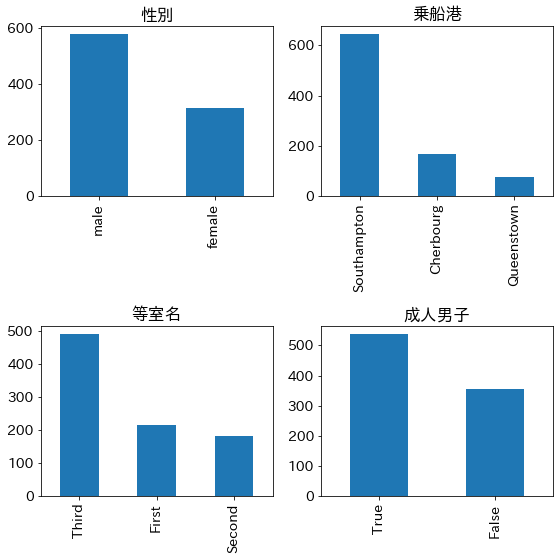

In [9]:
# define the graph
columns_c = ['性別', '乗船港', '等室名', '成人男子']

# adjust the graph
plt.rcParams['figure.figsize'] = (8,8)

# show histograms in for loops
for i, name in enumerate(columns_c):
    ax = plt.subplot(2, 2, i+1)
    df_titanic[name].value_counts().plot(kind = 'bar', title = name, ax = ax)

# adujst the layout
plt.tight_layout()
plt.show()


# Visual analysis

### アイリス・データセットの読み込み
### アイリス・データセットの各項目

**がく片長**(sepal_length)  
**がく片幅**(sepal_width)  
**花弁長**(petal_length)  
**花弁幅**(petal_width)  
  
**種別**(species):  versicolor/setosa/virginica

In [10]:
# import library
import seaborn as sns

# load the sample data
df_iris = sns.load_dataset("iris")

# translate columns names in Jpn
columns_i = ['がく片長', 'がく片幅', '花弁長', '花弁幅', '種別']
df_iris.columns = columns_i

# display the dataset
display(df_iris.head())

,がく片長,がく片幅,花弁長,花弁幅,種別
0,5.1000,3.5000,1.4000,0.2000,setosa
1,4.9000,3.0000,1.4000,0.2000,setosa
2,4.7000,3.2000,1.3000,0.2000,setosa
3,4.6000,3.1000,1.5000,0.2000,setosa
4,5.0000,3.6000,1.4000,0.2000,setosa


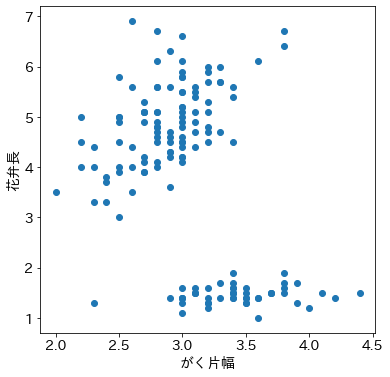

In [11]:
# scatter plot by matplotlib
## adjust the graph
plt.figure(figsize = (6,6))

## display the scatter plot
plt.scatter(df_iris['がく片幅'], df_iris['花弁長'])

## labels
# sepal がく petal 花弁
plt.xlabel('がく片幅')
plt.ylabel('花弁長')
plt.show()

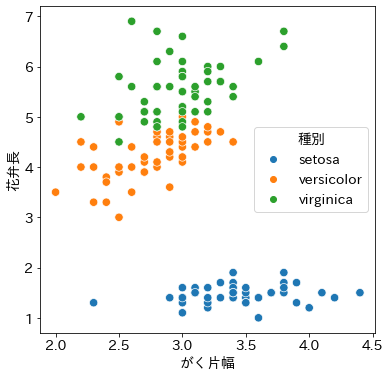

In [12]:
# recoloring the scatter plot by '種別' by matplotlib
plt.figure(figsize = (6,6))
sns.scatterplot(x = 'がく片幅', y = '花弁長', hue = '種別', s = 70, data = df_iris)
plt.show()

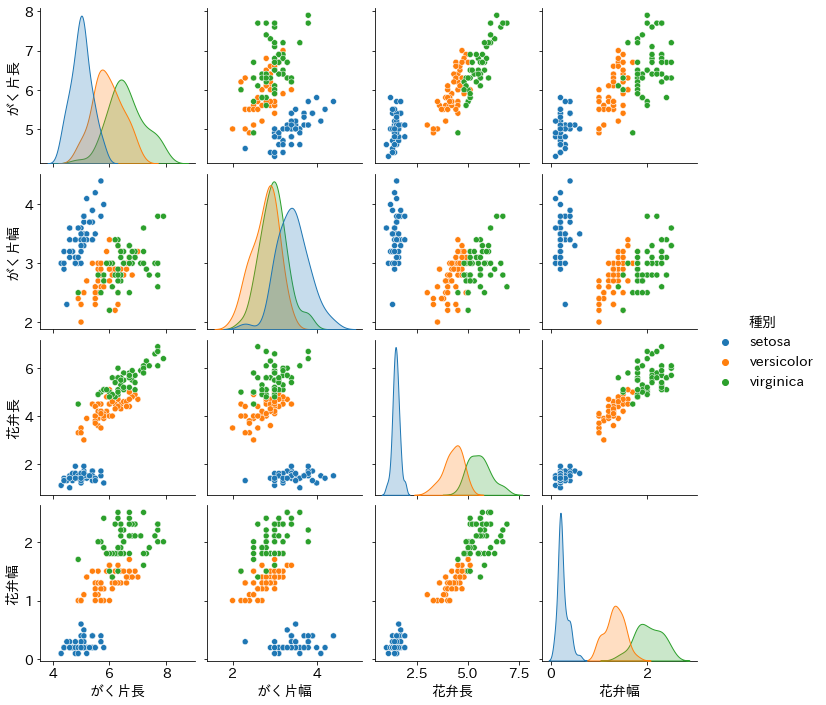

In [13]:
# all scatter plots by seaborn
sns.pairplot(df_iris, hue = '種別')
## seems '花弁長' and '花弁幅' are the most effective parameters for grouping the data
plt.show()

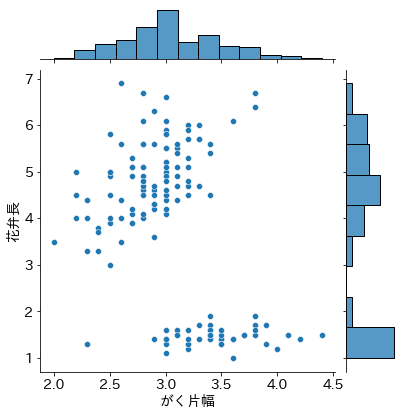

In [14]:
# scatter plot
sns.jointplot('がく片幅', '花弁長', data = df_iris)
plt.show()

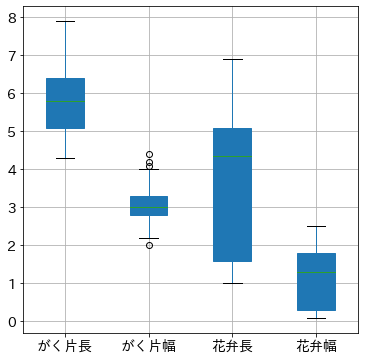

In [15]:
# boxplot by matplotlib
## adjust the graph
plt.figure(figsize = (6,6))

## display the boxplot 
df_iris.boxplot(patch_artist = True)
plt.show()

In [16]:
df_iris

,がく片長,がく片幅,花弁長,花弁幅,種別
0,5.1000,3.5000,1.4000,0.2000,setosa
1,4.9000,3.0000,1.4000,0.2000,setosa
2,4.7000,3.2000,1.3000,0.2000,setosa
3,4.6000,3.1000,1.5000,0.2000,setosa
4,5.0000,3.6000,1.4000,0.2000,setosa
...,...,...,...,...,...
145,6.7000,3.0000,5.2000,2.3000,virginica
146,6.3000,2.5000,5.0000,1.9000,virginica
147,6.5000,3.0000,5.2000,2.0000,virginica
148,6.2000,3.4000,5.4000,2.3000,virginica


,種別,variable,value
0,setosa,がく片長,5.1000
1,setosa,がく片長,4.9000
2,setosa,がく片長,4.7000
3,setosa,がく片長,4.6000
4,setosa,がく片長,5.0000


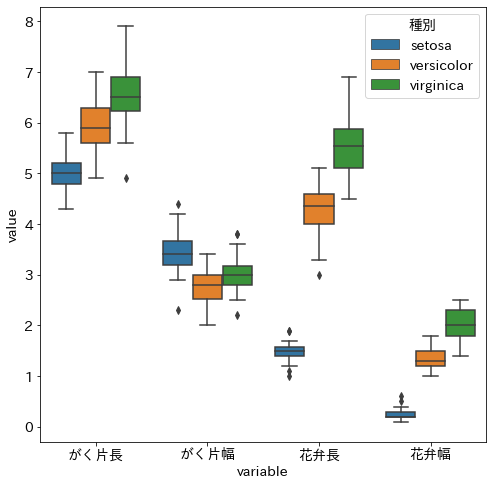

In [17]:
# boxplot by seaborn
## data processing by `melt` function
w = pd.melt(df_iris, id_vars = ['種別'])

# check the processed dataset
display(w.head())

# boxplot by `種別`
plt.figure(figsize = (8,8))
sns.boxplot(x = 'variable', y = 'value', data = w, hue = '種別')
plt.show()

# Data preprocess

#### 方針の決定

**乗船港コード**: 件数が2件と少ない
-> 行ごと削除する      

**年齢**: 数値データであり、欠損行数が177件とかなり多い
-> 他データの平均値で代用  

**デッキ**: コード値データであり、欠損行数が688行と相当多い
-> 欠損を意味するダミーコードを振って全行処理対象とする

### delete unnecessary data

In [18]:
## drop_list
drop_lst = ['等室名', '乗船港', '生存可否']
df3 = df_titanic.drop(drop_lst, axis = 1)

display(df3.head())

,生存,等室,性別,年齢,兄弟配偶者数,両親子供数,料金,乗船港コード,男女子供,成人男子,デッキ,独身
0,0,3,male,22.0000,1,0,7.2500,S,man,True,NaN,False
1,1,1,female,38.0000,1,0,71.2833,C,woman,False,C,False
2,1,3,female,26.0000,0,0,7.9250,S,woman,False,NaN,True
3,1,1,female,35.0000,1,0,53.1000,S,woman,False,C,False
4,0,3,male,35.0000,0,0,8.0500,S,man,True,NaN,True


In [19]:
# check missing values
display(df3.isnull().sum())

生存          0
等室          0
性別          0
年齢        177
兄弟配偶者数      0
両親子供数       0
料金          0
乗船港コード      2
男女子供        0
成人男子        0
デッキ       688
独身          0
dtype: int64

In [20]:
# check `デッキ` column
display(df3['デッキ'].value_counts())

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: デッキ, dtype: int64

In [21]:
# delete the 2 rows without `乗船港コード`
df4 = df3.dropna(subset = ['乗船港コード'])

# fill na in `年齢` column with mean values
age_avg = df4['年齢'].mean()
df5 = df4.fillna({'年齢': age_avg})

# replace na in `デッキ` column with dummy code(= N)
## デッキカラムの属性がcategoryなため、一旦属性の変形をする
df5['デッキ'] = df5['デッキ'].astype('str')
df5['デッキ'] = df5['デッキ'].replace('nan', 'N')

In [22]:
# check the null values again
display(df5.isnull().sum())

display(df5.head())

生存        0
等室        0
性別        0
年齢        0
兄弟配偶者数    0
両親子供数     0
料金        0
乗船港コード    0
男女子供      0
成人男子      0
デッキ       0
独身        0
dtype: int64

,生存,等室,性別,年齢,兄弟配偶者数,両親子供数,料金,乗船港コード,男女子供,成人男子,デッキ,独身
0,0,3,male,22.0000,1,0,7.2500,S,man,True,N,False
1,1,1,female,38.0000,1,0,71.2833,C,woman,False,C,False
2,1,3,female,26.0000,0,0,7.9250,S,woman,False,N,True
3,1,1,female,35.0000,1,0,53.1000,S,woman,False,C,False
4,0,3,male,35.0000,0,0,8.0500,S,man,True,N,True


In [23]:
# check `デッキ` column
display(df5['デッキ'].value_counts())

N    688
C     59
B     45
D     33
E     32
A     15
F     13
G      4
Name: デッキ, dtype: int64

### convert binary labels in numerals

In [24]:
# define the map
mf_map = {'male':1, 'female':0}

# convert to binary
df7 = df5.copy()
df7['性別'] = df7['性別'].map(mf_map)

# display the results
display(df7.head())

,生存,等室,性別,年齢,兄弟配偶者数,両親子供数,料金,乗船港コード,男女子供,成人男子,デッキ,独身
0,0,3,1,22.0000,1,0,7.2500,S,man,True,N,False
1,1,1,0,38.0000,1,0,71.2833,C,woman,False,C,False
2,1,3,0,26.0000,0,0,7.9250,S,woman,False,N,True
3,1,1,0,35.0000,1,0,53.1000,S,woman,False,C,False
4,0,3,1,35.0000,0,0,8.0500,S,man,True,N,True


In [25]:
# define the map function
tf_map = {True: 1, False: 0}

# convert to binary
df8 = df7.copy()
df8['成人男子'] = df8['成人男子'].map(tf_map)

# convert to binary
df9 = df8.copy()
df9['独身'] = df9['独身'].map(tf_map)

# check the results
display(df9.head())

,生存,等室,性別,年齢,兄弟配偶者数,両親子供数,料金,乗船港コード,男女子供,成人男子,デッキ,独身
0,0,3,1,22.0000,1,0,7.2500,S,man,1,N,0
1,1,1,0,38.0000,1,0,71.2833,C,woman,0,C,0
2,1,3,0,26.0000,0,0,7.9250,S,woman,0,N,1
3,1,1,0,35.0000,1,0,53.1000,S,woman,0,C,0
4,0,3,1,35.0000,0,0,8.0500,S,man,1,N,1


### convert multiple labels in numerals

In [26]:
# sample get_dummies function
w = pd.get_dummies(df9['男女子供'], prefix = '男女子供')
display(w.head(10))

,男女子供_child,男女子供_man,男女子供_woman
0,0,1,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,1,0
5,0,1,0
6,0,1,0
7,1,0,0
8,0,0,1
9,1,0,0


In [27]:
# one hot vector function
def enc(df, column):
    # generate one hot vector 
    df_dummy = pd.get_dummies(df[column], prefix = column)
    
    # delete the original columns
    df_drop = df.drop([column], axis = 1)

    # concat df and generated columns
    df1 = pd.concat([df_drop, df_dummy], axis = 1)

    return df1

In [28]:
# check the columns
display(df9['男女子供'].value_counts())

man      537
woman    269
child     83
Name: 男女子供, dtype: int64

In [29]:
# one-hot-encoding
## `男女子供`
df10 = enc(df9, '男女子供')

## `乗船コード`
df11 = enc(df10, '乗船港コード')

## `デッキ`
df12 = enc(df11, 'デッキ')

display(df12.head())

,生存,等室,性別,年齢,兄弟配偶者数,両親子供数,料金,成人男子,独身,男女子供_child,男女子供_man,男女子供_woman,乗船港コード_C,乗船港コード_Q,乗船港コード_S,デッキ_A,デッキ_B,デッキ_C,デッキ_D,デッキ_E,デッキ_F,デッキ_G,デッキ_N
0,0,3,1,22.0000,1,0,7.2500,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
1,1,1,0,38.0000,1,0,71.2833,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0
2,1,3,0,26.0000,0,0,7.9250,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,1,1,0,35.0000,1,0,53.1000,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
4,0,3,1,35.0000,0,0,8.0500,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1


### normalization and standardization
正規化と標準化

正規化はアルゴリズムによって有効である場合とない場合がある
- 線形回帰, ロジスティック回帰, SVMなどでは有効
- 決定木系、xgboost, lightgbmでは非有効

In [30]:
# standardization
df13 = df12.copy()
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
df13[['年齢', '料金']] = stdsc.fit_transform(df13[['年齢', '料金']])

# display the results
display(df13.head())

,生存,等室,性別,年齢,兄弟配偶者数,両親子供数,料金,成人男子,独身,男女子供_child,男女子供_man,男女子供_woman,乗船港コード_C,乗船港コード_Q,乗船港コード_S,デッキ_A,デッキ_B,デッキ_C,デッキ_D,デッキ_E,デッキ_F,デッキ_G,デッキ_N
0,0,3,1,-0.5896,1,0,-0.5002,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
1,1,1,0,0.6448,1,0,0.7889,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0
2,1,3,0,-0.2810,0,0,-0.4866,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,1,1,0,0.4134,1,0,0.4229,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
4,0,3,1,0.4134,0,0,-0.4841,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1


# Algorithm selection

## sample coding dataset making

In [31]:
# library
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.datasets import make_classification

# linear separability(線形分離型)
X1, y1 = make_classification(n_features = 2, n_redundant = 0,
    n_informative = 2, random_state = random_seed,
    n_clusters_per_class = 1, n_samples = 200, n_classes = 2)

# Make two interleaving half circles（三日月型, 線形分離不可）
X2, y2 = make_moons(noise = 0.05, random_state = random_seed,
    n_samples = 200)

# Make circular data（円形, 線形分離不可）
X3, y3 = make_circles(noise = 0.02, random_state = random_seed,
    n_samples = 200)

# combine three data to datalist
DataList = [(X1, y1), (X2, y2), (X3, y3)]

# N: number of types in data
N = len(DataList)

In [32]:
# # make_series image
# from PIL import Image
# filename = 'make_series_image.jpg'
# im = Image.open(filename)
# im

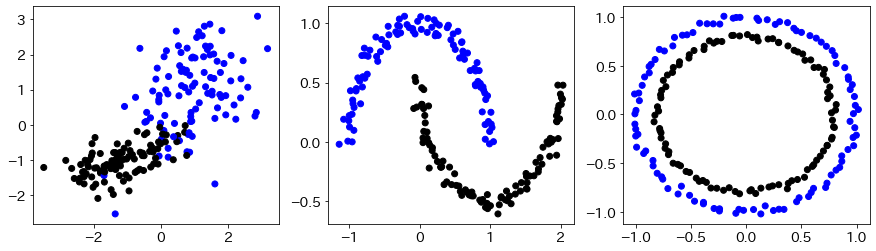

In [33]:
# show scatterplot
# adjust the graph
plt.figure(figsize = (15, 4))

# define color maps
from matplotlib.colors import ListedColormap

# #0000FF ≒ blue, #000000 ≒ black
cmap = ListedColormap(['#0000FF', '#000000'])

for i, data in enumerate(DataList):
    # i:0~2
    X, y = data
    # N = 3
    ax = plt.subplot(1, N, i+1)
    ax.scatter(X[:,0], X[:,1], c = y, cmap = cmap)

plt.show()

In [34]:
from sklearn.model_selection import train_test_split

# decision boundary plot function
def plot_boundary(ax, x, y, algorithm):
    x_train, x_test, y_train, y_test = train_test_split(x, y,
            test_size = 0.5, random_state = random_seed)
    
    # define color map
    from matplotlib.colors import ListedColormap
    
    # cm -> list of colors attribute eg: `bwr`,`Reds`,`Pastel1`...
    cmap1 = plt.cm.bwr
    cmap2 = ListedColormap(['#0000FF', '#000000'])

    h = 0.005
    algorithm.fit(x_train, y_train)
    score_test = algorithm.score(x_test, y_test)
    score_train = algorithm.score(x_train, y_train)
    f1_min = x[:, 0].min() - 0.5
    f1_max = x[:, 0].max() + 0.5
    f2_min = x[:, 1].min() - 0.5
    f2_max = x[:, 1].max() + 0.5
    f1, f2 = np.meshgrid(np.arange(f1_min, f1_max, h),
                        np.arange(f2_min, f2_max, h))
    if hasattr(algorithm, 'decision_function'):
        Z = algorithm.decision_function(np.c_[f1.ravel(), f2.ravel()])
        Z = Z.reshape(f1.shape)
        ax.contour(f1, f2, Z, levels=[0], linewidth=2)
    else:
        Z = algorithm.predict_proba(np.c_[f1.ravel(), f2.ravel()])[:, 1]
        Z = Z.reshape(f1.shape)
    ax.contourf(f1, f2, Z, cmap=cmap1, alpha=0.3)
    ax.scatter(x_test[:,0], x_test[:,1], c=y_test, cmap=cmap2)
    ax.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap=cmap2, marker='x')
    text = f'検証:{score_test:.2f}  訓練: {score_train:.2f}'
    ax.text(f1.max() - 0.3, f2.min() + 0.3, text, horizontalalignment='right',
    fontsize=18) 

In [35]:
# scatterplot and decision boundary plot function
def plot_boundaries(algorithm, DataList):
    plt.figure(figsize=(15,4))
    for i, data in enumerate(DataList):
        X, y = data
        ax = plt.subplot(1, N, i+1)
        plot_boundary(ax, X, y, algorithm)
    plt.show()

## Logistic regression

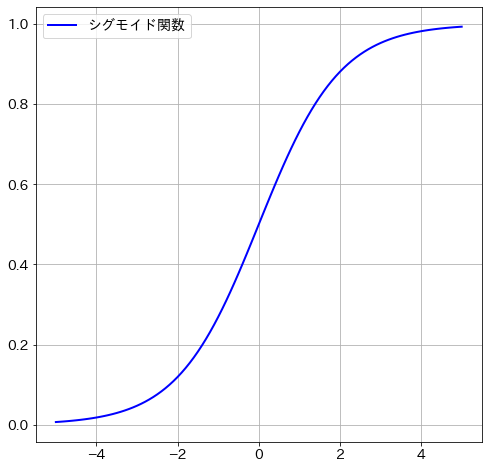

In [36]:
# define Sigmoid function
def sigmoid(x):
    return 1/(1 + np.exp(-x))

# get data for `x`
x = np.linspace(-5, 5, 101)

# get data for `y`
y = sigmoid(x)

# plot graph
plt.plot(x, y, label = 'シグモイド関数', c = 'b', lw = 2)

# add legends
plt.legend()

# add grind
plt.grid()

plt.show()

LogisticRegression(random_state=123)


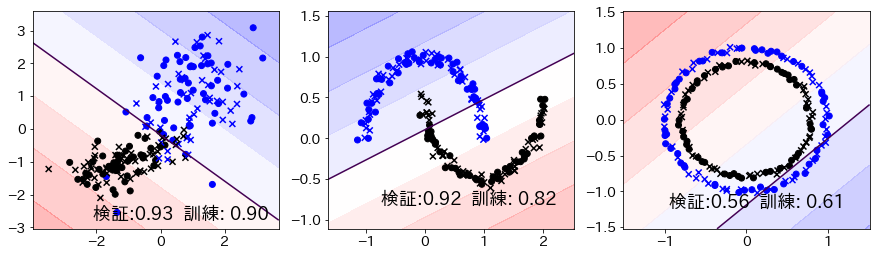

In [37]:
# show scatter plot and results from logistic regression

# select the algorithm
from sklearn.linear_model import LogisticRegression
algorithm = LogisticRegression(random_state = random_seed)

# show parameter
print(algorithm)

# call `scatterplot and decision boundary plot function`
plot_boundaries(algorithm, DataList)

## Support Vector Machine(SVM)

SVC(random_state=123)


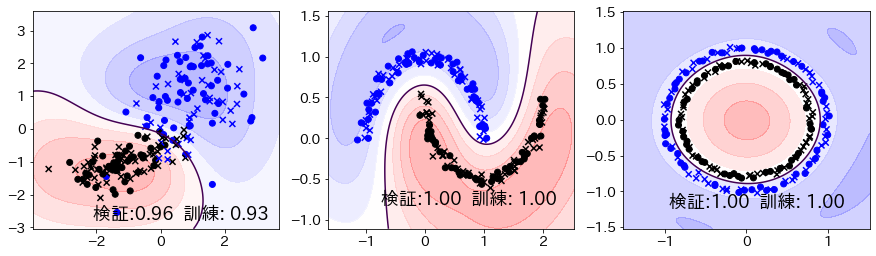

In [38]:
# show scatter plot and results from SVM(kernel)

# algorithm select
from sklearn.svm import SVC
## defaul kernel = 'rbf'
algorithm = SVC(kernel = 'rbf', random_state = random_seed)

# show parameter
print(algorithm)

# call `scatterplot and decision boundary plot function`
plot_boundaries(algorithm, DataList)

## Neural Network

MLPClassifier(random_state=123)


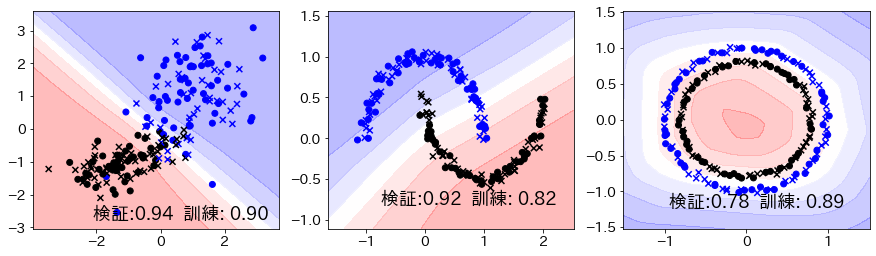

In [39]:
# show scatter plot and results from Neural Network

# algorithm selection
from sklearn.neural_network import MLPClassifier
algorithm = MLPClassifier(random_state = random_seed)

# show parameter
print(algorithm)

# call `scatterplot and decision boundary plot function`
plot_boundaries(algorithm, DataList)

MLPClassifier(hidden_layer_sizes=(100, 100), random_state=123)


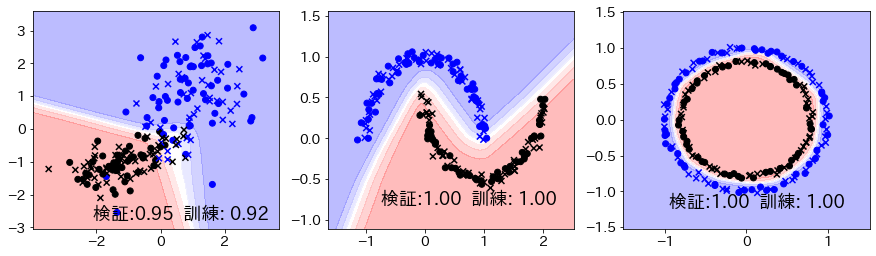

In [40]:
# show scatter plot and results from Nural Network with 100 layers

# algorithm selection
algorithm = MLPClassifier(hidden_layer_sizes = (100,100), random_state = random_seed)

# show parameter
print(algorithm)

# call `scatterplot and decision boundary plot function`
plot_boundaries(algorithm, DataList)

## Decision Tree

In [41]:
# sample_data
df_iris = sns.load_dataset('iris')

# narrow down two types of flowers
df2 = df_iris[50:150]

# split the data
X = df2.drop('species', axis = 1)
y = df2['species']

In [42]:
# learning
from sklearn.tree import DecisionTreeClassifier
algorithm = DecisionTreeClassifier(random_state = random_seed)
algorithm.fit(X, y)

DecisionTreeClassifier(random_state=123)

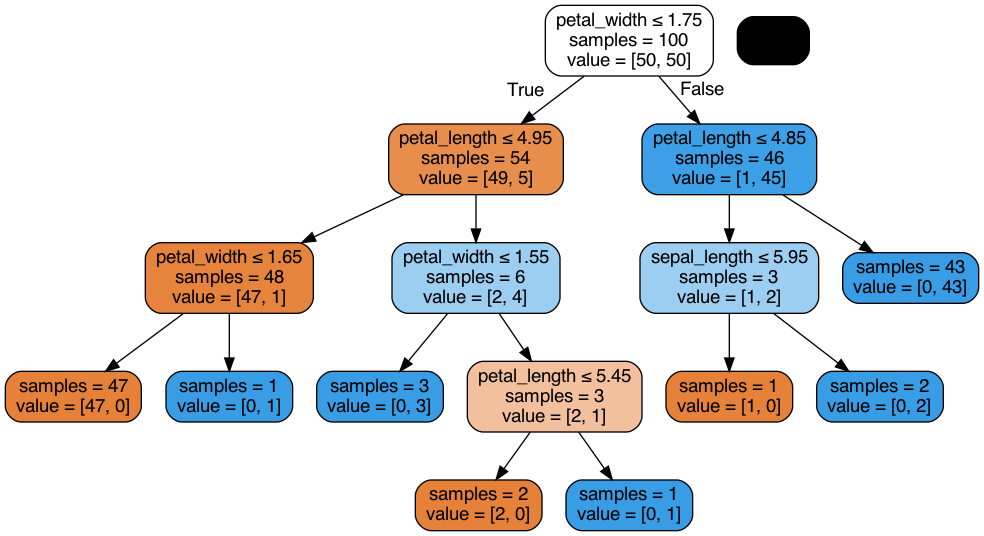

In [43]:
# show the decision tree
from sklearn import tree
with open('iris-dtree.dot', mode='w') as f:
    tree.export_graphviz( algorithm, out_file=f,
        feature_names=X.columns, filled=True, rounded=True,  
        special_characters=True, impurity=False, proportion=False
    ) 
import pydotplus
from IPython.display import Image
graph = pydotplus.graphviz.graph_from_dot_file('iris-dtree.dot')
graph.write_png('iris-dtree.png')
Image(graph.create_png())

DecisionTreeClassifier(random_state=123)


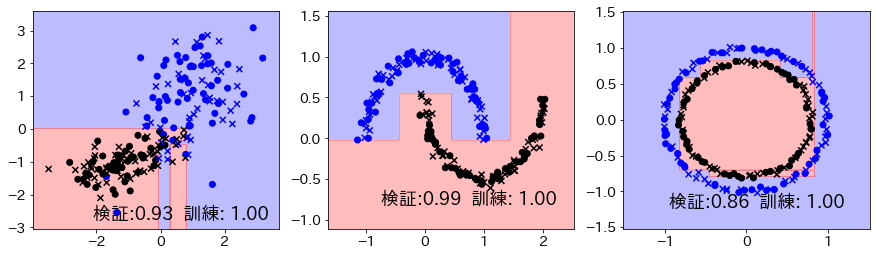

In [44]:
# show scatter plot and results from decision tree

# algorithm selection
from sklearn.tree import DecisionTreeClassifier
algorithm = DecisionTreeClassifier(random_state = random_seed)

# show parameters
print(algorithm)

# call `scatterplot and decision boundary plot function`
plot_boundaries(algorithm, DataList)

DecisionTreeClassifier(max_depth=3, random_state=123)


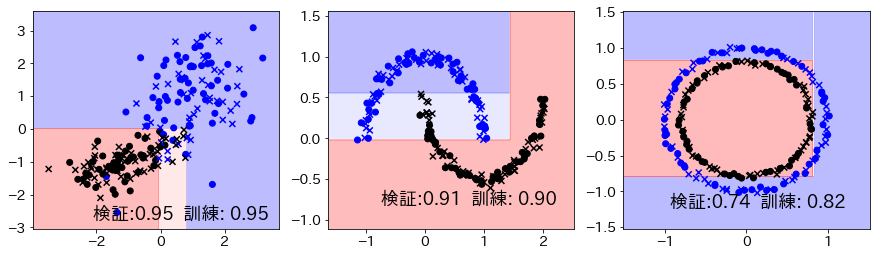

In [45]:
# show scatter plot and results from decision tree with max_depth = 3

# algorithm selection
from sklearn.tree import DecisionTreeClassifier
algorithm = DecisionTreeClassifier(max_depth = 3, random_state = random_seed)

# show parameters
print(algorithm)

# call `scatterplot and decision boundary plot function`
plot_boundaries(algorithm, DataList)

## random forest

RandomForestClassifier(random_state=123)


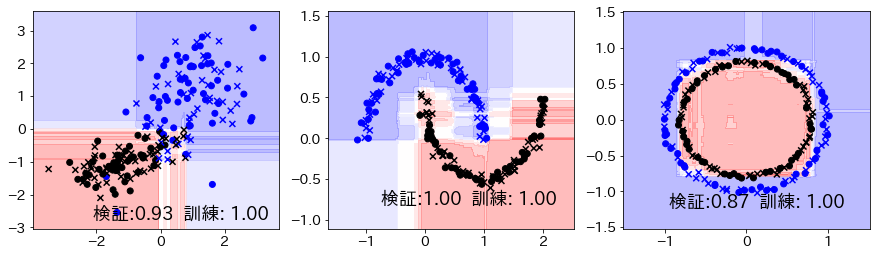

In [46]:
# show scatter plot and results from random forest

# algorithm selection
from sklearn.ensemble import RandomForestClassifier
algorithm = RandomForestClassifier(random_state = random_seed)

# show parameters
print(algorithm)

# call `scatterplot and decision boundary plot function`
plot_boundaries(algorithm, DataList)

## XGBoost

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_seed=123, random_state=None,
              reg_alpha=None, reg_lambda=None, scale_pos_weight=None,
              subsample=None, tree_method=None, validate_parameters=None,
              verbosity=None)
[19:15:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:576: 
Parameters: { "random_seed" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed dow

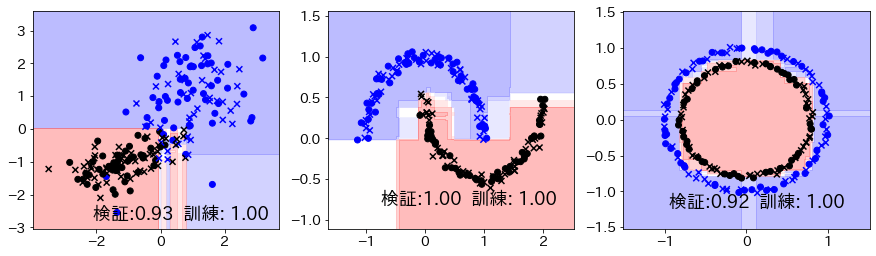

In [47]:
# show scatter plot and results from xgboost

# algorithm selection
# !pip install xgboost
# 以下参照し、homebrewでinstall
# https://harunaishina.hatenablog.com/entry/2021/04/20/023805

import xgboost
algorithm = xgboost.XGBClassifier(random_seed = random_seed)

# show parameters
print(algorithm)

# call `scatterplot and decision boundary plot function`
plot_boundaries(algorithm, DataList)

# Evaluation

## confusion matrix
use cancer data from scikit-learn

In [48]:
# import library
from sklearn.datasets import load_breast_cancer

# load the data
cancer = load_breast_cancer()

# input data(=cancer) x
x = cancer.data

# ground truth label
# change negative: 0, positive: 1
y = 1 - cancer.target

# the input data with only two columns
x2 = x[:, :2]

# split the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x2, y, train_size = 0.7, test_size = 0.3, random_state = random_seed)

In [49]:
# algorithm selection and evaluation

# algorithm selection (Logistic regression)
from sklearn.linear_model import LogisticRegression
algorithm = LogisticRegression(random_state = random_seed)

# learning
algorithm.fit(x_train, y_train)

# prediction
y_pred = algorithm.predict(x_test)

# evaluation
score = algorithm.score(x_test, y_test)

# result
print(f'score: {score:.4f}')

score: 0.8772


In [50]:
# confusion matrix

# import library
from sklearn.metrics import confusion_matrix

# create the matrix
# y_test: test_data's ground truth
# y_pred: train_data's prediction
matrix = confusion_matrix(y_test, y_pred)

# result
print(matrix)

[[101   2]
 [ 19  49]]


In [51]:
# create a confusion matrix display function
def make_cm(matrix, columns):
    # matrix numpy array

    # columns list
    n = len(columns)

    # list which repeats '正解データ' n times
    act = ['正解データ'] * n
    pred = ['予測結果'] * n

    # generate the dataframe
    cm = pd.DataFrame(matrix, columns = [pred, columns], index = [act, columns])

    return cm

In [52]:
# show confusion matrix using make_cm
cm = make_cm(matrix, ['良性', '悪性'])
display(cm)

予測結果    
           良性  悪性
正解データ 良性  101   2
      悪性   19  49

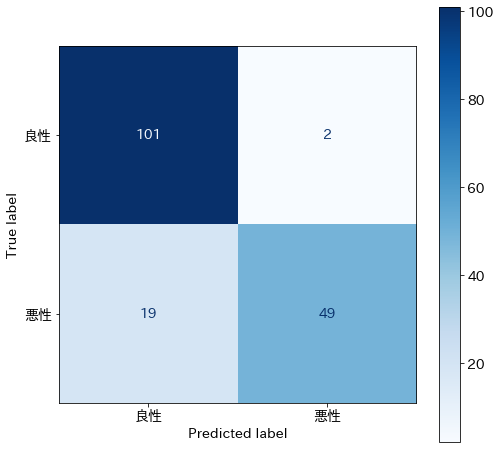

In [53]:
# another method for displaying the confusion matrix

# import library
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# output validation data's confusion matrix
cm = confusion_matrix(y_pred = y_pred, y_true = y_test)
cmp = ConfusionMatrixDisplay(cm, display_labels=['良性', '悪性'])

cmp.plot(cmap=plt.cm.Blues)
plt.show()

In [54]:
# Precision, recall, f-value

# import library
from sklearn.metrics import precision_recall_fscore_support

# calculate precision, recall, f-value
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average = 'binary')

# results
print(f'適合率: {precision:.4f}')
print(f'再現率: {recall:.4f}')
print(f'F値: {fscore:.4f}')

適合率: 0.9608
再現率: 0.7206
F値: 0.8235


In [55]:
# get probability by logistic regression
y_proba = algorithm.predict_proba(x_test)

# print 10 data（左が予測結果0に対する確率値、右が予測結果1に対する確率値）
print(y_proba[:10, :])

[[0.9925 0.0075]
 [0.9981 0.0019]
 [0.0719 0.9281]
 [0.8134 0.1866]
 [0.0345 0.9655]
 [0.6376 0.3624]
 [0.9694 0.0306]
 [0.9743 0.0257]
 [0.76   0.24  ]
 [0.9775 0.0225]]


In [56]:
# get probabilities of positive(1)
y_proba1 = y_proba[:,1]

# results
## ground truth
print(y_test[10:20])
## prediction
print(y_pred[10:20])
## probability
print(y_proba1[10:20])

[0 1 1 0 1 0 0 0 0 0]
[0 1 0 0 1 0 0 0 0 0]
[0.2111 0.9188 0.1617 0.0609 0.631  0.0549 0.0601 0.0506 0.0383 0.0164]


In [57]:
# change threshold and see the difference
thres = 0.5
print((y_proba1[10:20] > thres).astype(int))

thres = 0.7
print((y_proba1[10:20] > thres).astype(int))

[0 1 0 0 1 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0]


In [58]:
# create the function of prediction depending on thresholds change
def pred(algorithm, x, thres):
    # get prediction(matrix)
    y_proba = algorithm.predict_proba(x)

    # probability of positive(=1)
    y_proba1 = y_proba[:,1]

    # (probability of positive(=1)) > threshold -> create the array of 1,0
    y_pred = (y_proba1 > thres).astype(int)

    return y_pred

In [59]:
# threshold = 0.5
pred_05 = pred(algorithm, x_test, 0.5)

# threshold = 0.7
pred_07 = pred(algorithm, x_test, 0.7)

# results
print(pred_05[10:20])
print(pred_07[10:20])

[0 1 0 0 1 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0]


## PR Curve and ROC Curve

### Precision-Recall Curve

In [60]:
# import library
from sklearn.metrics import precision_recall_curve

# get precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_proba1)

# convert into dataframe
df_pr = pd.DataFrame([thresholds, precision, recall]).T
df_pr.columns = ['閾値', '適合度', '再現率']

# show the area of thres = 0.5
display(df_pr[52:122:10])


,閾値,適合度,再現率
52,0.1473,0.7901,0.9412
62,0.2027,0.8310,0.8676
72,0.3371,0.9344,0.8382
82,0.5347,0.9608,0.7206
92,0.7763,0.9756,0.5882
102,0.9025,1.0000,0.4559
112,0.9829,1.0000,0.3088


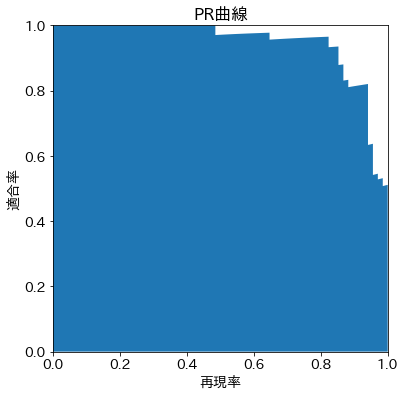

In [61]:
# draw the graph

# set the size of graph
plt.figure(figsize = (6,6))

# fill the graph
plt.fill_between(recall, precision, 0)

# range
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# labels
plt.xlabel('再現率')
plt.ylabel('適合率')
plt.title('PR曲線')
plt.show()

In [62]:
# calculate the area of the PR Curve
# auc = area under the curve
from sklearn.metrics import auc
pr_auc = auc(recall, precision)
print(f'PR曲線面積: {pr_auc:.4f}')

PR曲線面積: 0.9459


### ROC Curve (Receiver Operating Characteristic)

In [63]:
# create the array for ROC curve

# library
from sklearn.metrics import roc_curve

# get the false-positive-rate, Sensitivity, threshold
fpr, tpr, thresholds = roc_curve(y_test, y_proba1, drop_intermediate = False)

# convert into dataframe
df_roc = pd.DataFrame([thresholds, fpr, tpr]).T
df_roc.columns = ['閾値', '偽陽性率', '敏感度']

# 閾値0.5の周辺を表示
display(df_roc[21:91:10])

,閾値,偽陽性率,敏感度
21,0.9829,0.0000,0.3088
31,0.9025,0.0000,0.4559
41,0.7763,0.0097,0.5882
51,0.5347,0.0194,0.7206
61,0.3371,0.0388,0.8382
71,0.2027,0.1165,0.8676
81,0.1473,0.1650,0.9412


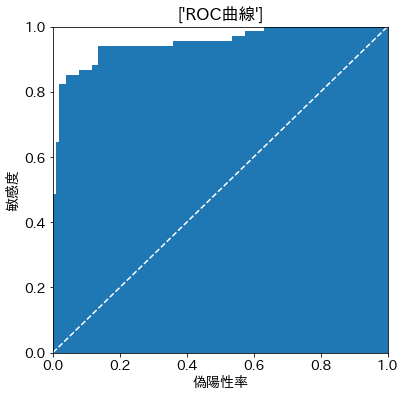

In [64]:
# plot the ROC

# set the size for plotting
plt.figure(figsize = (6,6))

# dotted line
plt.plot([0,1], [0,1], 'w--')

# fill the graph area
plt.fill_between(fpr, tpr, 0)

# set the range
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# show labels・title
plt.xlabel('偽陽性率')
plt.ylabel('敏感度')
plt.title(['ROC曲線'])
plt.show()

In [65]:
# calculate the area of ROC curve( = auc)
roc_auc = auc(fpr, tpr)
print(f'ROC曲線下面積:{roc_auc:.4f}')

ROC曲線下面積:0.9522


### plot the curve with a better model

In [66]:
# create the model with 30 inputs

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = random_seed)
algorithm = LogisticRegression()
algorithm.fit(x_train, y_train)
y_pred = algorithm.predict(x_test)
y_proba1 = algorithm.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba1)

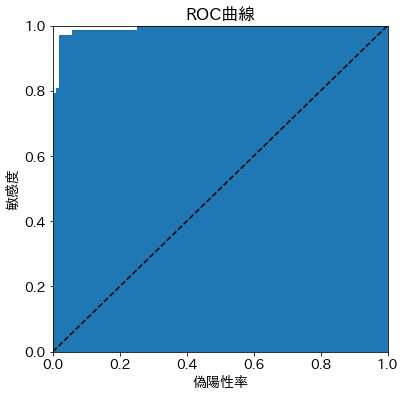

In [67]:
# plot ROC Curve
plt.figure(figsize = (6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.fill_between(fpr, tpr, 0)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('偽陽性率')
plt.ylabel('敏感度')
plt.title('ROC曲線')
plt.show()

In [68]:
# calculate ROC's AUC
roc_auc = auc(fpr, tpr)
print(f'ROC曲線下面積:{roc_auc:.4f}')

ROC曲線下面積:0.9921


## check the importance of input
detect the importance of each input (=columns)

In [69]:
# check the importance of input data using random_forest model

# sample data
import seaborn as sns
df_iris = sns.load_dataset('iris')
columns_i = ['がく片長', 'がく片幅', '花弁長', '花弁幅', '種別']
df_iris.columns = columns_i

# input data `x`
x = df_iris[['がく片長', 'がく片幅', '花弁長', '花弁幅']]

# ground truth data `y`
y = df_iris['種別']

# algorithm selection (random forest)
from sklearn.ensemble import RandomForestClassifier
algorithm = RandomForestClassifier(random_state = random_seed)

# learning
algorithm.fit(x, y)

RandomForestClassifier(random_state=123)

In [70]:
# get the importance vectors
importances = algorithm.feature_importances_

# create the series using columns names as keys
w = pd.Series(importances, index = x.columns)

# sort by the size of key
u = w.sort_values(ascending = False)

# output
print(u)

花弁長    0.4611
花弁幅    0.4257
がく片長   0.0874
がく片幅   0.0257
dtype: float64


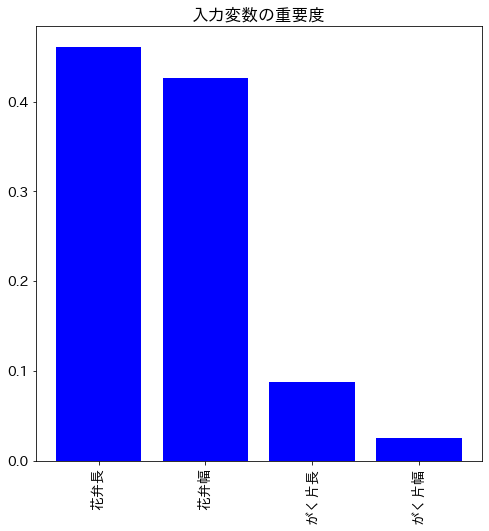

In [71]:
# barplot of importance

# plot the bar
plt.bar(range(len(u)), u, color = 'b', align =  'center')

# columns names (rotation = 90 degree)
plt.xticks(range(len(u)), u.index, rotation = 90)

# title
plt.title('入力変数の重要度')

plt.show()

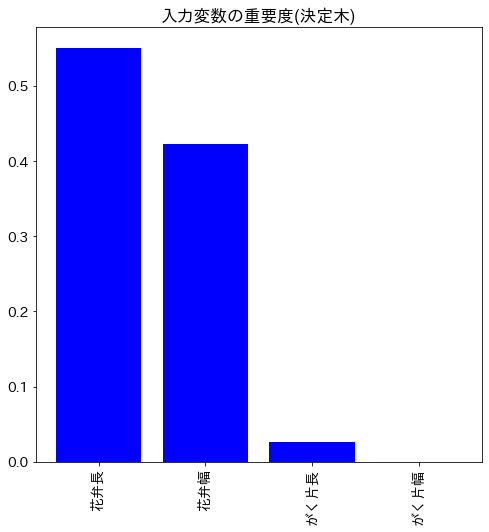

In [72]:
# decision tree

from sklearn.tree import DecisionTreeClassifier
algorithm = DecisionTreeClassifier(random_state = random_seed)
algorithm.fit(x, y)
importances = algorithm.feature_importances_
w = pd.Series(importances, index = x.columns)
u = w.sort_values(ascending = False)

plt.title('入力変数の重要度(決定木)')
plt.bar(range(len(u)), u, color = 'b', align = 'center')
plt.xticks(range(len(u)), u.index, rotation = 90)
plt.show()

[19:15:41] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


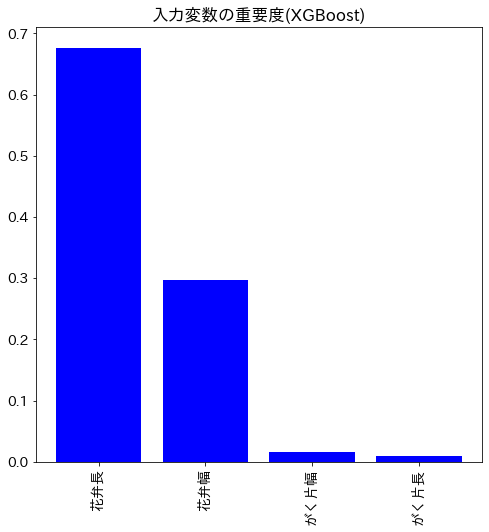

In [73]:
# xgboost

import xgboost
algorithm = xgboost.XGBClassifier(random_state = random_seed)
algorithm.fit(x, y)
importances = algorithm.feature_importances_
w = pd.Series(importances, index = x.columns)
u = w.sort_values(ascending = False)

plt.title('入力変数の重要度(XGBoost)')
plt.bar(range(len(u)), u, color = 'b', align = 'center')
plt.xticks(range(len(u)), u.index, rotation = 90)
plt.show()

## evaluation for regression model

In [74]:
# from data import to data analysis

# import data
from sklearn.datasets import load_boston
boston = load_boston()

# df: input data
df = pd.DataFrame(boston.data, columns = boston.feature_names)

# y: ground truth data (output data)
y = boston.target

# df1: input data with one column
df1 = df[['RM']]

# results
display(df.head())
display(df1.head())
print(y[:5])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.0063,18.0000,2.3100,0.0000,0.5380,6.5750,65.2000,4.0900,1.0000,296.0000,15.3000,396.9000,4.9800
1,0.0273,0.0000,7.0700,0.0000,0.4690,6.4210,78.9000,4.9671,2.0000,242.0000,17.8000,396.9000,9.1400
2,0.0273,0.0000,7.0700,0.0000,0.4690,7.1850,61.1000,4.9671,2.0000,242.0000,17.8000,392.8300,4.0300
3,0.0324,0.0000,2.1800,0.0000,0.4580,6.9980,45.8000,6.0622,3.0000,222.0000,18.7000,394.6300,2.9400
4,0.0691,0.0000,2.1800,0.0000,0.4580,7.1470,54.2000,6.0622,3.0000,222.0000,18.7000,396.9000,5.3300


,RM
0,6.5750
1,6.4210
2,7.1850
3,6.9980
4,7.1470


[24.  21.6 34.7 33.4 36.2]


In [75]:
# from algorithm selection to prediction

# algorithm: XGBRegressor
from xgboost import XGBRegressor
algorithm1 = XGBRegressor(objective = 'reg:squarederror', random_state = random_seed)

# learning(input data = df1)
algorithm1.fit(df1, y)

# prediction
y_pred1 = algorithm1.predict(df1)


# algorithm: XGBRegressor
from xgboost import XGBRegressor
algorithm2 = XGBRegressor(objectie = 'reg:squarederror', random_state = random_seed)

# learning(input data = df)
algorithm2.fit(df, y)

# prediction
y_pred2 = algorithm2.predict(df)

[19:15:42] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:576: 
Parameters: { "objectie" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [76]:
# results
print(f'y[:5] {y[:5]}')
print(f'y_pred1[:5] {y_pred1[:5]}')
print(f'y_pred2[:5] {y_pred2[:5]}')

y[:5] [24.  21.6 34.7 33.4 36.2]
y_pred1[:5] [24.2265 20.5349 34.8044 32.9725 35.9762]
y_pred2[:5] [24.0193 21.5997 34.7074 33.4074 36.1893]


### check with scatter plot

In [77]:
# calculate the max and min of y
y_range = np.array([y.min(), y.max()])

# output
print(y_range)

[ 5. 50.]


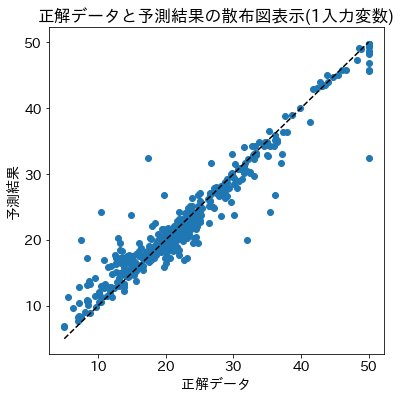

In [78]:
# scatter plot of y_pred1

# size setting
plt.figure(figsize = (6, 6))

# scatter plot
plt.scatter(y, y_pred1)

# ground truth data = pred_output line
plt.plot(y_range, y_range, 'k--')

# labels, title
plt.xlabel('正解データ')
plt.ylabel('予測結果')
plt.title('正解データと予測結果の散布図表示(1入力変数)')

plt.show()

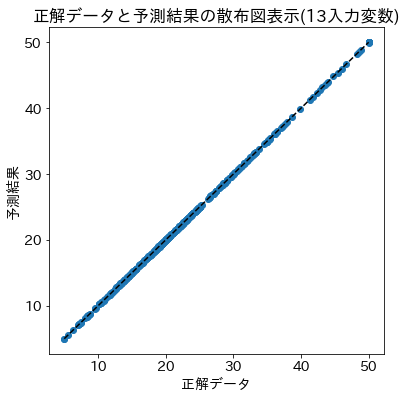

In [79]:
# scatter plot of y_pred2

# size setting
plt.figure(figsize = (6, 6))

# scatter plot
plt.scatter(y, y_pred2)

# ground truth data = pred_output line
plt.plot(y_range, y_range, 'k--')

# labels, title
plt.xlabel('正解データ')
plt.ylabel('予測結果')
plt.title('正解データと予測結果の散布図表示(13入力変数)')

plt.show()

### check with R2 score

In [80]:
# calculate r^2 score (input data = df1)
from sklearn.metrics import r2_score
r2_score1 = r2_score(y, y_pred1)
print(f'R2 score(1入力変数): {r2_score1:.4f}')

R2 score(1入力変数): 0.9251


In [81]:
# calculate r^2 score (input data = df)
r2_score2 = r2_score(y, y_pred2)
print(f'R2 score(13入力変数): {r2_score2:.4f}')

R2 score(13入力変数): 1.0000


# Model tuning

## algorithm selection

In [82]:
# import sample data
# breast cancer

# load the data
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# input data: x(30 columns)
# ground truth
x = cancer.data
y = cancer.target

In [83]:
# split the sample data

# parameter for split
test_size = 0.1

# data split
from sklearn.model_selection import train_test_split
# stratify = 層化抽出
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size, random_state = random_seed, stratify = y)

# check the size of each data
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(569, 30)
(512, 30)
(57, 30)


In [84]:
# create the multiple algorithm list
# compare the accuracy among multiple algorithms
# set the random_state equally to fix the output

# linear regression
from sklearn.linear_model import LogisticRegression
algorithm1 = LogisticRegression(random_state = random_seed)

# SVM(kernel)
from sklearn.svm import SVC
algorithm2 = SVC(kernel = 'rbf', random_state = random_seed)

# decision tree
from sklearn.tree import DecisionTreeClassifier
algorithm3 = DecisionTreeClassifier(random_state = random_seed)

# random forest
from sklearn.ensemble import RandomForestClassifier
algorithm4 = RandomForestClassifier(random_state = random_seed)

# XGBoost
from xgboost import XGBClassifier
algorithm5 = XGBClassifier(random_state = random_seed)

# algorithm list
algorithms = [algorithm1, algorithm2, algorithm3, algorithm4, algorithm5]

In [85]:
# compare the accuracy among multiple algorithms
for algorithm in algorithms:

    # learning
    algorithm.fit(x_train, y_train)

    # accuracy check
    score = algorithm.score(x_test, y_test)

    # algorithm selection
    name = algorithm.__class__.__name__

    # print accuracy and accuracy
    print(f'score: {score:.4f} {name}')

score: 0.9474 LogisticRegression
score: 0.8947 SVC
score: 0.9474 DecisionTreeClassifier
score: 0.9298 RandomForestClassifier
[19:15:42] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
score: 0.9825 XGBClassifier


## hyperparameters

In [86]:
# verify the default parameter
algorithm = SVC(kernel = 'rbf', random_state = random_seed)

print(algorithm)

SVC(random_state=123)


In [87]:
# optimization of gamma
gammas = [1, 0.1, 0.001, 0.0001, 0.00001]

for gamma in gammas:
    algorithm = SVC(kernel = 'rbf', gamma = gamma,
                random_state = random_seed)
    algorithm.fit(x_train, y_train)
    score = algorithm.score(x_test, y_test)
    print(f'score: {score:.4f} gamma: {gamma}')

score: 0.6316 gamma: 1
score: 0.6316 gamma: 0.1
score: 0.9474 gamma: 0.001
score: 0.9474 gamma: 0.0001
score: 0.9474 gamma: 1e-05


In [88]:
# optimization of C
# gamma = 0.001

Cs = [1, 10, 100, 1000, 10000]
for C in Cs:
    algorithm = SVC(kernel = 'rbf', gamma = 0.001, C = C, random_state = random_seed)
    algorithm.fit(x_train, y_train)
    score = algorithm.score(x_test, y_test)
    print(f'score: {score:.4f} C: {C}')

score: 0.9474 C: 1
score: 0.9298 C: 10
score: 0.9298 C: 100
score: 0.9298 C: 1000
score: 0.9298 C: 10000


## cross-validation
アルゴリズム選択やパラメータチューニングでの最適な条件を求めるため

In [89]:
# cross-validation for a specific algorithm

# algorithm definition
algorithm = SVC(kernel = 'rbf', random_state = random_seed, gamma = 0.001, C = 1)

# split data using `StratifiedKFold` (=層状K分割) -> 良性と悪性の割合がほぼ均等
from sklearn.model_selection import StratifiedKFold
stratifiedkfold = StratifiedKFold(n_splits = 3)

# Cross-validation (cv = 3)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(algorithm, x_train, y_train, cv = stratifiedkfold)

# mean
mean = scores.mean()

# print the result
print(f'平均スコア: {mean:.4f} 個別スコア: {scores}')

平均スコア: 0.9141 個別スコア: [0.8889 0.9181 0.9353]


In [90]:
# compare the accuracy among multiple algorithms

# use StartifiedKFold for splitting the data
from sklearn.model_selection import StratifiedKFold
stratifiedkfold = StratifiedKFold(n_splits = 3)

from sklearn.model_selection import cross_val_score
# use the list of algorithms
for algorithm in algorithms:
    # cross-validation
    scores = cross_val_score(algorithm, x_train, y_train, cv = stratifiedkfold)
    score = scores.mean()
    name = algorithm.__class__.__name__
    print(f'平均スコア: {score:.4f} 個別スコア: {scores} {name}')


平均スコア: 0.9453 個別スコア: [0.9357 0.9474 0.9529] LogisticRegression
平均スコア: 0.9062 個別スコア: [0.9064 0.9181 0.8941] SVC
平均スコア: 0.9062 個別スコア: [0.8713 0.9415 0.9059] DecisionTreeClassifier
平均スコア: 0.9629 個別スコア: [0.9649 0.9591 0.9647] RandomForestClassifier
[19:15:43] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:15:43] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:15:43] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in 

## grid-search

In [91]:
# explore best parameters with grid-search and cross-validation
params = {
    'C' : [1, 10, 100, 1000, 10000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
}

algorithm = SVC(random_state = random_seed)

from sklearn.model_selection import StratifiedKFold
stratifiedkfold = StratifiedKFold(n_splits = 3)

from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(algorithm, params, cv = stratifiedkfold)
gs.fit(x_train, y_train)

# get the best model and use it to classify the validation data
best = gs.best_estimator_
best_pred = best.predict(x_test)
print(best)

SVC(C=1000, gamma=1e-05, random_state=123)


In [92]:
# accuracy_check
score = best.score(x_test, y_test)
print(f'スコア: {score:.4f}')

# confusion matrix
from sklearn.metrics import confusion_matrix
print()
print('混同行列')
print(confusion_matrix(y_test, best_pred))

スコア: 0.9825

混同行列
[[20  1]
 [ 0 36]]
